### Statistics Lab 

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

* Last evaluation
* Number of projects
* Average monthly hours
* Time spent at the company
* Whether they have had a work accident
* Whether they have had a promotion in the last 5 years
* Department
* Salary
* Whether the employee has left

** This dataset is simulated **

Obtained from Kaggle https://www.kaggle.com/ludobenistant/hr-analytics

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
hr = pd.read_csv("data/HR_comma_sep.csv")

In [27]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 1. What is the mean average monthly hours worked by an employee? 

In [28]:
hr.average_monthly_hours.mean()

201.0503366891126

#### 2. What is the median satisfaction level for employees?

In [33]:
hr["satisfaction_level"].median()

0.64

#### 3. What is the most common / mode number of projects worked on?

In [34]:
hr.number_project.mode()

0    4
dtype: int64

#### 4. Create boxplots of satisfaction level and last evaluation 

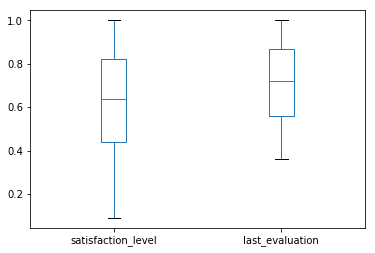

In [35]:
hr[["satisfaction_level", "last_evaluation"]].plot(kind="box")

#### 5. What is the correlation between employee satisfaction and their last evaluation?

In [36]:
hr[["satisfaction_level", "last_evaluation"]].corr()

,satisfaction_level,last_evaluation
satisfaction_level,1.000000,0.105021
last_evaluation,0.105021,1.000000


#### 6. Plot a histogram of the average monthly hours with 20 bins

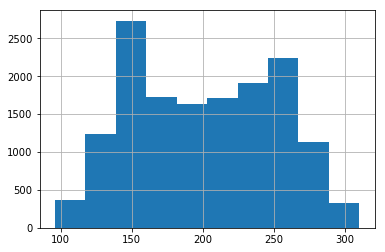

In [38]:
hr["average_monthly_hours"].hist()

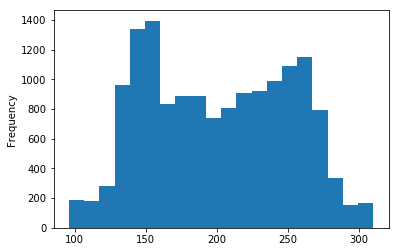

In [41]:
hr.average_monthly_hours.plot(kind="hist", bins=20)

#### 7. Plot a density plot of the satisfaction level

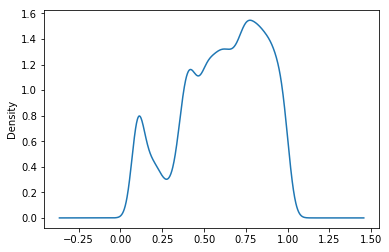

In [42]:
hr.satisfaction_level.plot(kind="density")

#### 8. What is the Skew and Kurtosis of the average monthly hours variable?

In [43]:
hr.average_monthly_hours.skew()

0.052841989416324203

In [44]:
hr.average_monthly_hours.kurtosis()

-1.1349815681924558

#### 9. Which variable has the highest correlation with whether the employee has left?

In [16]:
import numpy as np

In [48]:
hr.corr()["left"].abs()

satisfaction_level       0.388375
last_evaluation          0.006567
number_project           0.023787
average_monthly_hours    0.071287
time_spent_company       0.144822
work_accident            0.154622
left                     1.000000
promotion_last_5years    0.061788
Name: left, dtype: float64

In [49]:
hr.corr()["left"]

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_monthly_hours    0.071287
time_spent_company       0.144822
work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

In [45]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### 10. Which departments have the most number of employees who have left? 

In [53]:
hr[hr["left"] == 1].groupby("department").size().sort_values(ascending=False)

department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
dtype: int64

#### 11. Which column(s) requires dummy variables? Create the dummy variables for the column and append to the dataset

In [54]:
dept_dummies = pd.get_dummies(hr["department"], prefix="dept", drop_first=True)

In [55]:
hr = pd.concat([hr, dept_dummies], axis=1)

In [56]:
salary_groups = {'low': 0, 'medium': 1, 'high': 2}
hr['salary_index']= hr['salary'].map(salary_groups)

In [57]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_index
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0,0
